<a href="https://colab.research.google.com/github/AntVictorBN/Met-Num-Newton-DFP-e-BFGS/blob/main/TCC_Met_num.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Métodos Numéricos do TCC

Na minha dissertação de TCC realizamos um estudo, tanto teórico quanto prático, em relação aos métodos quase-Newton denominados DFP e BFGS. Aqui irei mostrar a parte prática dos meus estudos e os códigos dos algoritmos dos métodos de Newton, DFP e BFGS para uma análise na resolução de dois problemas de otimização irrestrita.

#### Bibliotecas importantes que usaremos no Problema 1 e no Problema 2

- numdifftools - Para calcular o vetor gradiente e a matriz Hessiana da função objetivo.

- numpy - Para a criação e manipulação dos vetores e matrizes criadas.

- matplotlib - Para a criação dos gráficos para análise.

- time - Para calcular o tempo que os algoritmos levaram para chegar ao resultado.

- pandas - Para a criação da tabela dos tempos que cada método levou para chegar a solução.

In [ ]:
import numdifftools as nd
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

#### Problema 1

Duas estações elétricas bão fornecer energia a uma certa região da forma mais econômica possível. O custo total de operação das duas estações é dada por:

$f(x_1,x_2)=0.1+0.001x_1x_2+0.15(x_2)^4-0.25(x_1+x_2-100)$

Em que $x_1$ é a energia fornecida pela primeira estação e $x_2$ é a energia fornecida pela segunda estação. Determine os velores de $x_1$ e $x_2$ de forma a minimizar o custo total de operação das duas estações. Utilize como aproximação inicial o ponto $(2,1)^T$.

#### Valores Iniciais

- $x_0$ = $(2,1)^T$ - Aproximação inicial.
- e = $10^{-8}$ - Erro da aproximação.

In [ ]:
x0 = np.array([2, 1])

e = 1e-8

#### Função objetivo

$f(x_1,x_2)=0.1+0.001x_1x_2+0.15(x_2)^4-0.25(x_1+x_2-100)$

In [ ]:
def f(x):
  return 0.1 + 0.001 * x[0] * x[1] + 0.15 * x[1]**4 + 0.01 * x[0]**4 - 0.25 * (x[0] + x[1] + 100)

#### Gradiente da função objetivo -  $∇f(x)$.

In [ ]:
def Gr(x):
  return nd.Gradient(f)(x)

#### Inversa da matriz Hessiana da função objetivo - $[∇^2 f(x)]^{-1}$.

In [ ]:
def InvH(x):
  H = nd.Hessian(f)(x)
  return np.linalg.inv(H)

#### Norma do gradiente de x - $||∇f(x)||$ - para a verificação da condição do ERRO (menor que $10^{-8}$).

In [ ]:
def erro(x):
  return np.linalg.norm(Gr(x))

#### Busca de Armijo

Aqui definiremos o algortimo da busca de armijo para fazer a buscar do melhor passo na direção de descida.

______________________________

$\textbf{Algoritmo:}$ Busca de Armijo

______________________________

$\textbf{Dados:}$ $x \in \mathbb{R}^n$ e $d \in \mathbb{R}^n$

$t=1$

$\textbf{Para}$ $f(x+td)>f(x)+(0.5) t \times ∇f(x)^Td$ $\textbf{faça}$

| $\hspace{0.5cm}$ $t=(0.8)t$

$\textbf{fim}$

$\textbf{Resultado:}$ Valor de t
______________________________

In [ ]:
def armijo(x,d):
  t = 1

  while f(x + t*d) > f(x) + 0.5 * t * (Gr(x) @ d):
    t = 0.8 * t

  return t

#### Armazenamento de Dados para os Gráficos

Abaixo temos criamos algumas listas para armazenar os dados necessários para criarmos os gráficos para a análise gráfica.

- Valores de x e y dos pontos encontrados no método de Newton serão armazenados, respectivamente, em XN e YN. Já o número da interação e do valor da norma do gradiente de cada ponto encontrado serão armazenado, respectivamente, em KN e EN.

- Valores de x e y dos pontos encontrados no método DFP serão armazenados, respectivamente, em XD e YD. Já o número da interação e do valor da norma do gradiente de cada ponto encontrado serão armazenado, respectivamente, em KD e ED.

- Valores de x e y dos pontos encontrados no método BFGS serão armazenados, respectivamente, em XB e YB. Já o número da interação e do valor da norma do gradiente de cada ponto encontrado serão armazenado, respectivamente, em KB e EB.

In [ ]:
# Método de Newton
XN = [2]
YN = [1]
KN = [0]
EN = [erro(x0)]

# Método DFP
XD = [2]
YD = [1]
KD = [0]
ED = [erro(x0)]

#Método BFGS
XB = [2]
YB = [1]
KB = [0]
EB = [erro(x0)]

### Algoritmos do métodos de Newton, DFP e BFGS para o problema 1.

Abaixo temos os algoritmos dos métodos de Newton, DFP e BFGS. Para cada método temos os resultados obtidos na resolução do Problema 1, como o valor x que minimiza a função objetiva, o número de interações necessários pra chegar ao resultado e o valor da norma do gradiente do ponto x encontrado.

#### Método de Newton

______________________________________

Algoritmo: Método de Newton

______________________________________

Dados: $x_0 \in \mathbb{R}^n$ e como a tolerância de parada $ϵ>0$.

$k = 0$

Para $||\nabla f(x_k)||>ϵ$ Faça

| $\hspace{0.5cm}$ $d_k = - [∇^2 f(x_k)]^{-1} \times ∇ f(x_k) $

| $\hspace{0.5cm}$ $t_k = t$ tal que $t$ é encontrado pelo Algoritmo de Armijo

| $\hspace{0.5cm}$ $x_{k+1} = x_k + t_k \times d_k$

| $\hspace{0.5cm}$ $k = k+1$

Fim

Resulatado: Valor de x

______________________________________

In [ ]:
x = x0
k = 0

while erro(x) > e:
  dk = - InvH(x) @ Gr(x)
  tk = armijo(x, dk)
  x = x + tk * dk
  k = k + 1

  KN.append(k)
  EN.append(erro(x))

  XN.append(x[0])
  YN.append(x[1])

print('Valor de x:', x)
print('Número de iterações:', k)
print('valor do erro (norma do gradiente):', erro(x))

Valor de x: [1.84018404 0.7450637 ]
Número de iterações: 4
valor do erro (norma do gradiente): 8.032610924100155e-10


#### Método de DFP

______________________________________

Algoritmo: Método DFP

______________________________________

Dados: $x_0 \in \mathbb{R}^n$, $H_0 \in \mathbb{R}^{n \times n}$ e como a tolerância de parada $ϵ>0$.

$k = 0$

Para $||\nabla f(x_k)||>ϵ$ Faça

| $\hspace{0.5cm}$ $d_k = - H_k \times ∇ f(x_k) $

| $\hspace{0.5cm}$ $t_k = t$ tal que $t$ é encontrado pelo Algoritmo de Armijo

| $\hspace{0.5cm}$ $x_{k+1} = x_k + t_k \times d_k$

| $\hspace{0.5cm}$ $p_k = x_{k+1} - x_k$

| $\hspace{0.5cm}$ $q_k = \nabla f(x_{k+1}) - ∇ f(x_k)$

| $\hspace{0.5cm}$ determine

| $\hspace{2cm}$ $H_{k+1} = H_k + \frac{p_k(p_k)^T}{(p_k)^Tq_k} - \frac{H_kq_k(q_k)^TH_k}{(q_k)^TH_kq_k}$

| $\hspace{0.5cm}$ $k = k+1$

Fim

Resulatado: Valor de x

______________________________________

In [ ]:
k = 0
x = x0
Hk = InvH(x)

while erro(x) > e:
  dk = -Hk @ Gr(x)
  tk = armijo(x,dk)

  xk = x + tk * dk

  pk = np.array([xk - x]).T
  qk = np.array([Gr(xk) - Gr(x)]).T

  Hk = Hk + (pk @ pk.T) / (pk.T @ qk) - (Hk @ qk @ qk.T @ Hk) / (qk.T @ Hk @ qk)

  x = xk
  k = k + 1

  KD.append(k)
  ED.append(erro(x))

  XD.append(x[0])
  YD.append(x[1])

print('Valor de x:', x)
print('Número de iterações:', k)
print('valor do erro (norma do gradiente)', erro(x))

Valor de x: [1.84018404 0.7450637 ]
Número de iterações: 8
valor do erro (norma do gradiente) 1.9172739085303944e-10


#### Método BFGS

______________________________________

Algoritmo: Método BFGS

______________________________________

Dados: $x_0 \in \mathbb{R}^n$, $H_0 \in \mathbb{R}^{n \times n}$ e como a tolerância de parada $ϵ>0$.

$k = 0$

Para $||\nabla f(x_k)||>ϵ$ Faça

| $\hspace{0.5cm}$ $d_k = - H_k \times ∇ f(x_k) $

| $\hspace{0.5cm}$ $t_k = t$ tal que $t$ é encontrado pelo Algoritmo de Armijo

| $\hspace{0.5cm}$ $x_{k+1} = x_k + t_k \times d_k$

| $\hspace{0.5cm}$ $p_k = x_{k+1} - x_k$

| $\hspace{0.5cm}$ $q_k = \nabla f(x_{k+1}) - ∇ f(x_k)$

| $\hspace{0.5cm}$ $s_k = \frac{1}{(p_k)^Tq_k}$

| $\hspace{0.5cm}$ determine

| $\hspace{2cm}$ $H_{k+1} = H_k + [1+s_k((q_k)^TH_kq_k)]s_k(p_k(p_k)^T) - s_k[p_k(q_k)^TH_k + H_kq_k(p_k)^T]$

| $\hspace{0.5cm}$ $k = k+1$

Fim

Resulatado: Valor de x

______________________________________

In [ ]:
k = 0
x = x0
Hk = InvH(x)

while erro(x) > e:
  dk = -Hk @ Gr(x)
  tk = armijo(x,dk)

  xk = x + tk * dk

  pk = np.array([xk - x]).T
  qk = np.array([Gr(xk) - Gr(x)]).T
  sk = (1 / (pk.T @ qk))

  Hk = Hk + ((1+((qk.T @ Hk @ qk) * sk )) * ((pk @ pk.T) * sk)) - ((pk @ qk.T @ Hk) + (Hk @ qk @ pk.T))* sk

  x = xk

  k = k+1

  KB.append(k)
  EB.append(erro(x))

  XB.append(x[0])
  YB.append(x[1])

print('Valor de x:', x)
print('Número de iterações:', k)
print('valor do erro (norma do gradiente)', erro(x))

Valor de x: [1.84018404 0.7450637 ]
Número de iterações: 8
valor do erro (norma do gradiente) 1.114104458476671e-10


### Gráfico para análise dos métodos no Problema 1

Abaixo temos dois gráficos para uma analise dos métodos em relação ao comportamento e velocidade de convergência de cada método.

#### Gráfico 1
- Gráfico das curvas de nível da função objetiva f e os pontos encontrados em cada método.

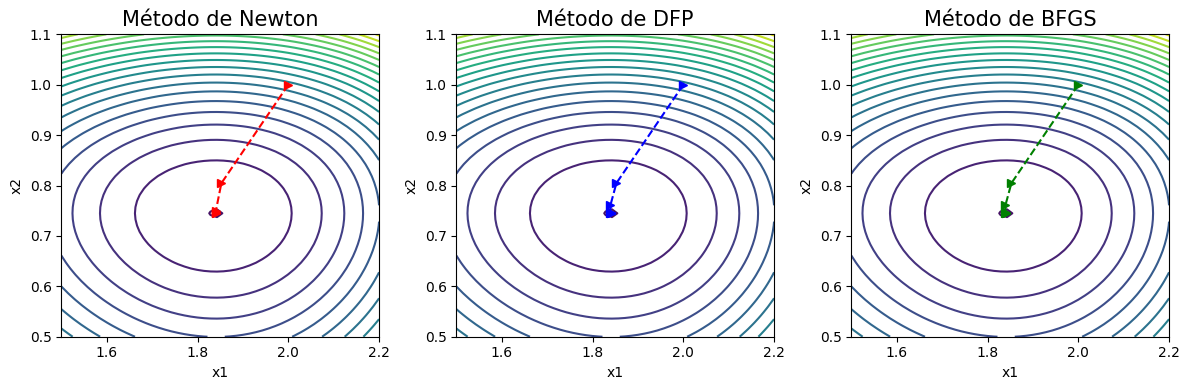

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

X = np.linspace(1.5,2.2,50)
Y = np.linspace(0.5,1.1,50)

X,Y=np.meshgrid(X,Y)

Z = 0.1 + 0.001 * X * Y + 0.15 * (Y ** 4) + 0.01 * (X ** 4) - 0.25 * (X + Y - 100)

axes[0].contour(X,Y,Z,20)
axes[0].plot(XN,YN, '-->', color='red')
axes[0].set_title('Método de Newton', fontsize = 15)
axes[0].set_xlabel('x1', fontsize = 10)
axes[0].set_ylabel('x2', fontsize = 10)

axes[1].contour(X,Y,Z,20)
axes[1].plot(XD,YD, '-->', color='blue')
axes[1].set_title('Método de DFP', fontsize = 15)
axes[1].set_xlabel('x1', fontsize = 10)
axes[1].set_ylabel('x2', fontsize = 10)

axes[2].contour(X,Y,Z,20)
axes[2].plot(XB,YB, '-->', color='green')
axes[2].set_title('Método de BFGS', fontsize = 15)
axes[2].set_xlabel('x1', fontsize = 10)
axes[2].set_ylabel('x2', fontsize = 10)

fig.tight_layout()

#### Gráfico 2

- Gráfico da relação entre o número da iteração e da norma do gradiente de cada ponto x encontrado por cada método.

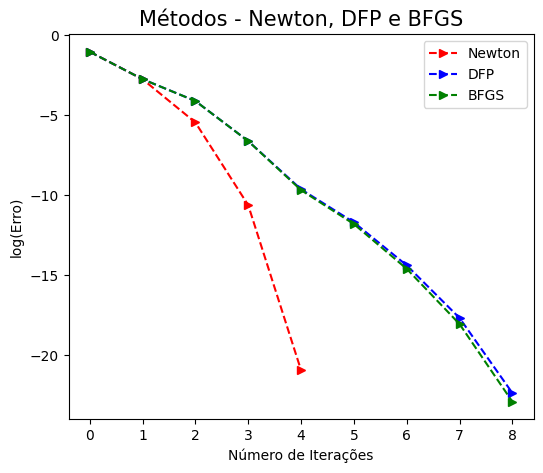

In [ ]:
fig = plt.figure(figsize=(6, 5))

plt.plot(KN,np.log(EN), '--o', color='red')
plt.plot(KD,np.log(ED), '--o', color='blue')
plt.plot(KB,np.log(EB), '--o', color='green')
plt.title('Métodos - Newton, DFP e BFGS', fontsize = 15)
plt.xlabel('Número de Iterações', fontsize = 10)
plt.ylabel('log(Erro)', fontsize = 10)
plt.legend(['Newton','DFP','BFGS'])

plt.show()

### Problema 2

Seis estações elétricas vão fornecer energia a uma certa região da forma mais econômica possível. O custo total de operação das seis estações é dado por:

$F(x)=0.1+0.001 \left(
\prod_{i=1}^{6}x_i \right) +0.15x_1^4+0.01x_2^4+0.05x_3^4+0.17x_4^4+0.05x_5^4+0.09x_6^4-0.25\left[ \left( \sum_{i=1}^{6}x_i \right) -100 \right]$

Em que $x = (x_1,x_2,x_3,x_4,x_5,x_6)$, sendo cada $x_i$, com $i=1, ..., 6$, a quantidade de energia fornecida por cada estação. Determine o valor de $x$ de forma a minimizar o custo total de operação das seis estações.

### Valores Inicias

- $x_0 = (2,1,2,1,2,1)^T$ - aproximação inicial.
- $e = 10^{-8}$ - Erro da aproximação.

In [ ]:
X0 = np.array([2, 1, 2, 1, 2, 1])

e = 1e-8

### Função objetivo

$F(x)=0.1+0.001 \left(
\prod_{i=1}^{6}x_i \right) +0.15x_1^4+0.01x_2^4+0.05x_3^4+0.17x_4^4+0.05x_5^4+0.09x_6^4-0.25\left[ \left( \sum_{i=1}^{6}x_i \right) -100 \right]$

In [ ]:
def F(x):
    return 0.1+0.001*(np.prod(x))+0.15*(x[0]**4)+0.01*(x[1]**4)+0.05*(x[2]**4)+0.17*(x[3]**4)+0.05*(x[4]**4)+0.09*(x[5]**4)-0.25*(sum(x)-100)

### Gradiente da função objetivo - $\nabla F(x)$.

In [ ]:
def GrF(x):
    return nd.Gradient(F)(x)

### Inversa da Matriz Hessiana da função objetivo - $[∇^2F(x)]^{-1}$.

In [ ]:
def InvHF(x):
    H = nd.Hessian(F)(x)
    return np.linalg.inv(H)

### Norma do gradiente de x- $||∇F(x)||$ - Para a verificação da condição do ERRO (menor que $10^{-8}$).

In [ ]:
def erroF(x):
  return np.linalg.norm(GrF(x))

### Busca de Armijo para a função objetivo $F(x)$

Aqui definiremos o algoritmo da busca de Armijo para fazer a buscar do passo na direção de descida.

In [ ]:
def armijoF(x,d):
  t = 1

  while F(x + t*d) > F(x) + 0.5 * t * (GrF(x) @ d):
    t = 0.8 * t

  return t

#### Armazenamento de Dados para os Gráficos do Problema 2

Abaixo temos criamos algumas listas para armazenar os dados necessários para criarmos os gráficos para a análise gráfica e de tempo.

- Valor do número da interação e da norma do gradiente de cada ponto encontrado no método de Newton serão armazenados, respectivamente, em KNF e ENF. Já o tempo, em segundos, e número de iterações que o método levou para chegar a solução serão armazenados, respectivamente, em Tn e kn.

- Valor do número da interação e da norma do gradiente de cada ponto encontrado no método DFP serão armazenados, respectivamente, em KDF e EDF. Já o tempo, em segundos, e número de iterações que o método levou para chegar a solução serão armazenados, respectivamente, em Td e kd.

- Valor do número da interação e da norma do gradiente de cada ponto encontrado no método BFGS serão armazenados, respectivamente, em KBF e EBF. Já o tempo, em segundos, e número de iterações que o método levou para chegar a solução serão armazenados, respectivamente, em Tb e kb.

In [ ]:
# Método de Newton
KNF = [0]
ENF = [erroF(X0)]
Tn = 0
Kn = 0

# Método DFP
KDF = [0]
EDF = [erroF(X0)]
Td = 0
Kd = 0

#Método BFGS
KBF = [0]
EBF = [erroF(X0)]
Tb = 0
Kb = 0

### Algoritmos do métodos de Newton, DFP e BFGS para o problema 2.

Abaixo temos os algoritmos dos métodos de Newton, DFP e BFGS. Para cada método temos os resultados obtidos na resolução do Problema 1, como o valor x que minimiza a função objetiva, o número de interações necessários pra chegar ao resultado e o valor da norma do gradiente do ponto x encontrado.

### Método de Newton

In [ ]:
InicioN = time.time() # Iniciar a contagem de tempo

k = 0
x = X0

while erroF(x) > e:
  dk = - InvHF(x) @ GrF(x)
  tk = armijoF(x, dk)
  x = x + tk * dk
  k = k + 1

  KNF.append(k)
  ENF.append(erroF(x))

FimN = time.time() # Parar a contagem de tempo

Tn = (FimN-InicioN)
Kn = (k)

print('Valor de x:', x)
print('Número de iterações:', k)
print('valor do erro (norma do gradiente):', erroF(x))

Valor de x: [0.7455569  1.84067473 1.07587494 0.7150363  1.07587494 0.88420567]
Número de iterações: 6
valor do erro (norma do gradiente): 3.641294838119018e-10


### Método DFP

In [ ]:
InicioD = time.time() # Iniciar a contagem de tempo

k = 0
x = X0
Hk = InvHF(x)

while erroF(x) > e:
  dk = -Hk @ GrF(x)
  tk = armijoF(x,dk)

  xk = x + tk * dk

  pk = np.array([xk - x]).T
  qk = np.array([GrF(xk) - GrF(x)]).T

  Hk = Hk + (pk @ pk.T) / (pk.T @ qk) - (Hk @ qk @ qk.T @ Hk) / (qk.T @ Hk @ qk)

  x = xk
  k = k + 1

  KDF.append(k)
  EDF.append(erroF(x))

FimD = time.time() # Parar a contagem de tempo

Td = (FimD-InicioD)
Kd = (k)

print('Valor de x:', x)
print('Número de iterações:', k)
print('valor do erro (norma do gradiente):', erroF(x))

Valor de x: [0.74555689 1.84067472 1.07587494 0.71503631 1.07587494 0.88420567]
Número de iterações: 19
valor do erro (norma do gradiente): 8.873003240379469e-09


### Método BFGS

In [ ]:
InicioB = time.time() # Iniciar a contagem de tempo

k = 0
x = X0
Hk = InvHF(x)

while erroF(x) > e:
  dk = -Hk @ GrF(x)
  tk = armijoF(x,dk)

  xk = x + tk * dk

  pk = np.array([xk - x]).T
  qk = np.array([GrF(xk) - GrF(x)]).T
  sk = (1 / (pk.T @ qk))

  Hk = Hk + ((1+((qk.T @ Hk @ qk) * sk )) * ((pk @ pk.T) * sk)) - ((pk @ qk.T @ Hk) + (Hk @ qk @ pk.T))* sk

  x = xk

  k = k+1

  KBF.append(k)
  EBF.append(erroF(x))

FimB = time.time() # Parar a contagem de tempo

Tb = (FimB-InicioB)
Kb = (k)

print('Valor de x:', x)
print('Número de iterações:', k)
print('valor do erro (norma do gradiente):', erroF(x))

Valor de x: [0.74555689 1.84067473 1.07587494 0.71503631 1.07587494 0.88420567]
Número de iterações: 17
valor do erro (norma do gradiente): 2.6444439635490344e-09


### Gráfico e Tabela para análise da velocidade de convergência e do tempo para a resolução.


#### Gráfico

- Gráfico da relação entre o número da iteração e da norma do gradiente de cada ponto x encontrado por cada método.

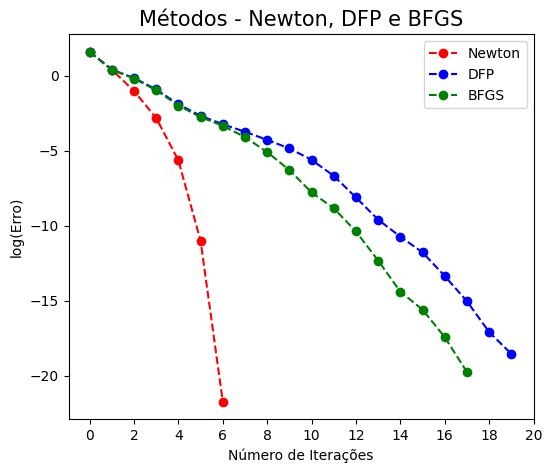

In [ ]:
fig = plt.figure(figsize=(6, 5))

plt.plot(KNF,np.log(ENF), '--o', color='red')
plt.plot(KDF,np.log(EDF), '--o', color='blue')
plt.plot(KBF,np.log(EBF), '--o', color='green')
plt.title('Métodos - Newton, DFP e BFGS', fontsize = 15)
plt.xlabel('Número de Iterações', fontsize = 10)
plt.ylabel('log(Erro)', fontsize = 10)
plt.xticks(np.arange(0,22,2))
plt.legend(['Newton','DFP','BFGS'])

plt.show()

#### Tabela

- Tabela contendo as informações do tempo, em segundo, que cada método levou para chegar a solução, o número de iterações e o tempo médio que cada um teve por iteração.

In [ ]:
dados = [['Newton',Tn,Kn,Tn/Kn],['DFP',Td,Kd,Td/Kd],['BFGS',Tb,Kb,Tb/Kb]]
colunas = ['métodos','Tempo para a resolução','Nº Iteração','Tempo Médio por iteração']

tabela = pd.DataFrame(dados,columns=colunas)
display(tabela)

,métodos,Tempo para a resolução,Nº Iteração,Tempo Médio por iteração
0,Newton,0.612260,6,0.102043
1,DFP,1.206579,19,0.063504
2,BFGS,1.288450,17,0.075791
